

  - Implement a time-series data using RNN.

### Importing required Models and Loading Training Data

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
print(dataset_train.shape)
dataset_train.head(5)

(1258, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


### Data Preparation - Scaling, Splitting and Transforming

In [6]:
training_set = dataset_train.iloc[:, 1:2].values

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### RNN model Building

In [20]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)               

### Model Compilation and Training

In [22]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
38/38 [==============================] - 11s 173ms/step - loss: 0.1234
Epoch 2/20
38/38 [==============================] - 8s 216ms/step - loss: 0.0833
Epoch 3/20
38/38 [==============================] - 8s 215ms/step - loss: 0.0690
Epoch 4/20
38/38 [==============================] - 7s 175ms/step - loss: 0.0573
Epoch 5/20
38/38 [==============================] - 8s 216ms/step - loss: 0.0477
Epoch 6/20
38/38 [==============================] - 7s 174ms/step - loss: 0.0356
Epoch 7/20
38/38 [==============================] - 8s 210ms/step - loss: 0.0281
Epoch 8/20
38/38 [==============================] - 7s 197ms/step - loss: 0.0218
Epoch 9/20
38/38 [==============================] - 7s 187ms/step - loss: 0.0213
Epoch 10/20
38/38 [==============================] - 8s 209ms/step - loss: 0.0188
Epoch 11/20
38/38 [==============================] - 7s 174ms/step - loss: 0.0145
Epoch 12/20
38/38 [==============================] - 8s 214ms/step - loss: 0.0139
Epoch 13/20
38/38 [=====

### Predictions using Test Dataset

In [23]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [24]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 415ms/step


- Visualizing the predicted data against real data

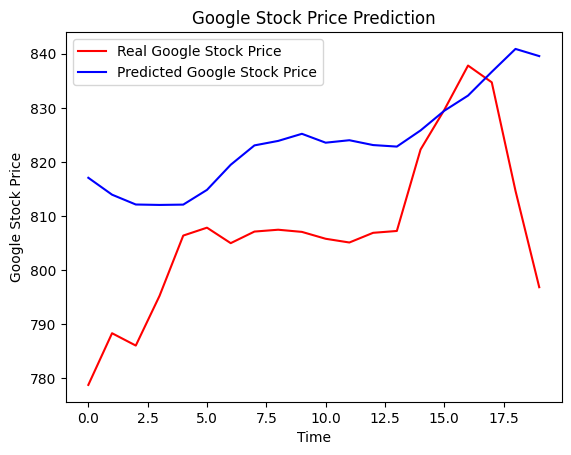

In [25]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

<hr>